In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data[:,2:] #petal length and width
y = iris['target']

In [3]:
tree_clf = DecisionTreeClassifier(max_depth  = 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [4]:
preds = tree_clf.predict([[5,1.5]])
print(preds)

[1]


In [5]:
preds = tree_clf.predict_proba([[5,1.5]])
print(preds)

[[0.         0.90740741 0.09259259]]


In [6]:
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)
max_depth = [1,2,3,4,5,6]
accuracy = []
for i in max_depth:
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(X_test, y_test)
    score = clf.score(X_test,y_test)
    accuracy.append(score)
print("The highest accuracy is with a depth of: ", max_depth[accuracy.index(max(accuracy))], " and an accuracy of ", max(accuracy))


The highest accuracy is with a depth of:  2  and an accuracy of  1.0


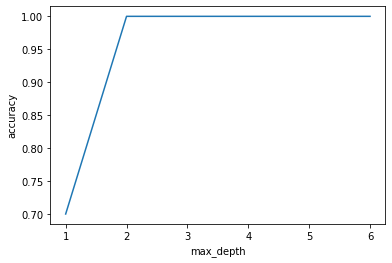

In [7]:
plt.plot(max_depth,accuracy)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

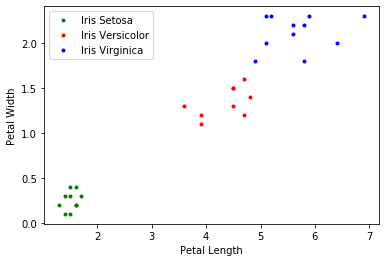

In [10]:
preds2 = tree_clf.predict(X_test)
plt.plot(X_test[:,0][preds2 == 0], X_test[:,1][preds2==0], 'g.', label = 'Iris Setosa')
plt.plot(X_test[:,0][preds2 == 1], X_test[:,1][preds2==1], 'r.', label = 'Iris Versicolor')
plt.plot(X_test[:,0][preds2 == 2], X_test[:,1][preds2==2], 'b.', label = 'Iris Virginica')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()